<center>
    <h1>Deep Learning for Natural Language Processing</h1>
</center>

In this notebook we will develop a **sentiment classifier** on a given English-language **Twitter Dataset** containing some user comments. The main goal is to build a model that understands whether a specific comment has a **positive** sentiment or a **negative** sentiment.

## Loading the Datasets 📥🗂️

We will  begin by importing the **dataset** we are going to work with. The provided dataset consists of **3 CSV files** each one having its significant role in the process. We have the **training**, **validating** and **testing** files.
1. The training file is going to be used to train our model.
2. The validating file will tell us how good our model is by computing its accuracy.
3. The testing file is going to be used to test our model and extract some results and statistics.

Let's load our dataset files that are located in the `/Data/` directory.

In [64]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

dataset_base_filepath = '../Data/Raw' # "/kaggle/input/ai-2-deep-learning-for-nlp-homework-1"
images_base_filepath = '../imgs' # "/kaggle/input/images"

# Load all the dataset files using pandas and store inside some dataframe variables
train_df = pd.read_csv(f'{dataset_base_filepath}/train_dataset.csv')
val_df = pd.read_csv(f'{dataset_base_filepath}/val_dataset.csv')
test_df = pd.read_csv(f'{dataset_base_filepath}/test_dataset.csv')

# Reduce the data sizes
size=1
train_df = train_df.sample(frac=size)
val_df = val_df.sample(frac=size)
# test_df = test_df.sample(frac=size)

print(train_df.shape, val_df.shape, test_df.shape)

(148388, 3) (42396, 3) (21199, 2)


Let's take a look at some of the records of the training dataset.

In [65]:
train_df.head()

,ID,Text,Label
5534,58876,#SQUARESPACE....left the doggy home alone,0
85821,20209,@Keyknow Oh good! Sorry you didn't win the tix...,1
94612,67702,graham is trying to get some online hilarious,1
16846,67558,@crisk i meant wieder... Lol. Send me your kel...,1
41924,125628,im so fucking bored i want to party like now,0


### Data sizes 📏📐

Let's have a look at the **sizes** of these datasets. In machine learning a **suitable size** of training, validating and testing data is around 70%, 20% and 10% respectively. 

Training Dataset size: 148388
Validating Dataset size: 42396
Testing Dataset size: 21199


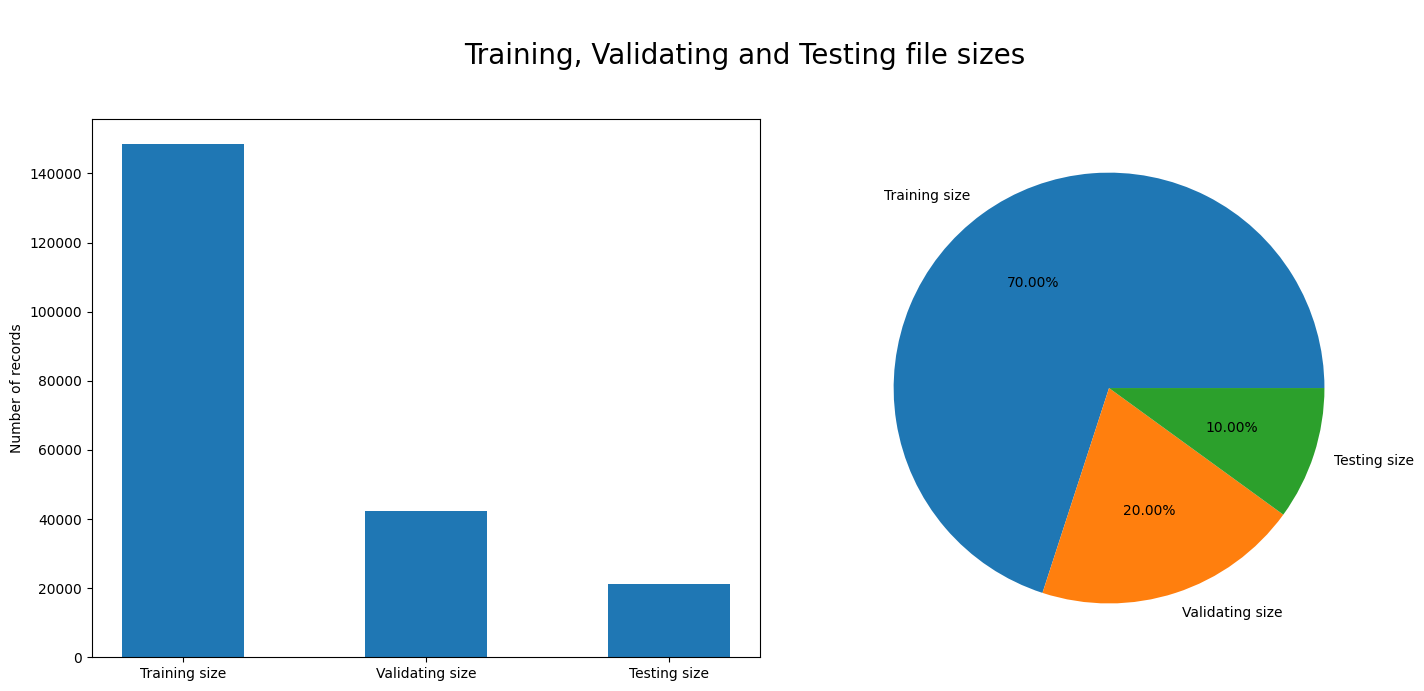

In [66]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

colors=['#99CCFF', '#C0DCFF', '#DAEDFF']

# Get the number of records for each dataset
train_size = train_df.shape[0]
val_size = val_df.shape[0]
test_size = test_df.shape[0]

print(f"Training Dataset size: {train_size}")
print(f"Validating Dataset size: {val_size}")
print(f"Testing Dataset size: {test_size}")

sizes = [train_size, val_size, test_size]
labels = ["Training size", "Validating size", "Testing size"]

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(labels, sizes, width=0.5)
axes[0].set_ylabel("Number of records")

axes[1].pie(sizes, labels=labels, autopct="%1.2f%%")

plt.suptitle("\nTraining, Validating and Testing file sizes\n", fontsize=20)
plt.tight_layout()
plt.show()

From the results above we can easily tell that our dataset files satisfy the data splitting criterion.

### Data Analysis and Cleaning 📈📊🧹

The first step of the whole process is to **pre-process** and **clean** our dataset files. In Machine Learning and AI applications, this is the initial and really important step. We will focus on
1. Transform shortcuts like **"I'm" to "I am"**.
2. Removing **URLs**, **User mentions**, **Hashtags** and **special characters**.
3. **Lowercasing** the texts
4. Removing **extra spaces** and **line breaks**
5. Applying **stemming** and **lemmatization**

Let's begin by implementing a **function** that will handle the data pre-processing for a given string.

In [67]:
import os
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import contractions

# nltk.download('wordnet')
# nltk.download('omw-1.4')

# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

def clean_text(text: str) -> str:
    text = text.lower() # Convert to lowercase
    text = contractions.fix(text) # Expand contractions
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # Remove url links
    text = re.sub(r"@\w+", "", text) # Remove mentions
    text = re.sub(r"#(\w+)", "", text) # Remove hastags
    text = re.sub(r"(?<!\.)\.(?!\.)|[^\w\s\?\!]", "", text)
    text = re.sub(r"\.\.\.", " ... ", text)  # Ensure '...' is treated as a single token
    
    text = re.sub(r"&[^;\s]+;", "", text) # Remove special characters
    text = re.sub(r"\s+", " ", text) # Remove extra spaces
    
    text = re.sub(r"\d+", "", text)
    
    # words = text.split()
    # stemmed_words = [stemmer.stem(word) for word in words] # Apply stemming
    # lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words] # Apply lemmatization
    # text = " ".join(lemmatized_words)
    
    return text

Let's apply this function to the 3 dataset files, and see the results.

In [68]:
import time

# Apply the cleaning function to every dataset file and create a new column with the modified text
start_time = time.time()
train_df["Cleaned_text"] = train_df["Text"].apply(clean_text)
val_df["Cleaned_text"] = val_df["Text"].apply(clean_text)
test_df["Cleaned_text"] = test_df["Text"].apply(clean_text)
end_time = time.time()

print(f"Datasets were cleaned in {end_time - start_time} seconds.")

train_df.head(10)

Datasets were cleaned in 4.179025411605835 seconds.


,ID,Text,Label,Cleaned_text
5534,58876,#SQUARESPACE....left the doggy home alone,0,left the doggy home alone
85821,20209,@Keyknow Oh good! Sorry you didn't win the tix...,1,oh good! sorry you did not win the tix but gl...
94612,67702,graham is trying to get some online hilarious,1,graham is trying to get some online hilarious
16846,67558,@crisk i meant wieder... Lol. Send me your kel...,1,i meant wieder lol send me your kelkheim later
41924,125628,im so fucking bored i want to party like now,0,i am so fucking bored i want to party like now
138076,189006,"You are not alone tonight, Imagine me there by...",0,you are not alone tonight imagine me there by ...
89944,104788,@Zadi foodporn... Ooooh... you tease,0,foodporn ooooh you tease
81703,49010,"@ace_libre Man, I am too! Am definitely going ...",1,man i am too! am definitely going to haywire ...
132670,178563,@patrickd88 Let's be PC here... I believe it's...,1,let us be pc here i believe it is interspecie...
7713,102654,I'm being all avoidy with people from my proje...,0,i am being all avoidy with people from my proj...


We will now proceed to **analyze** the **training dataset**. We are going to focus on the **words** of each tweet and extract the most frequent ones, by generating a **Word Cloud** and a **Bar Plot**.

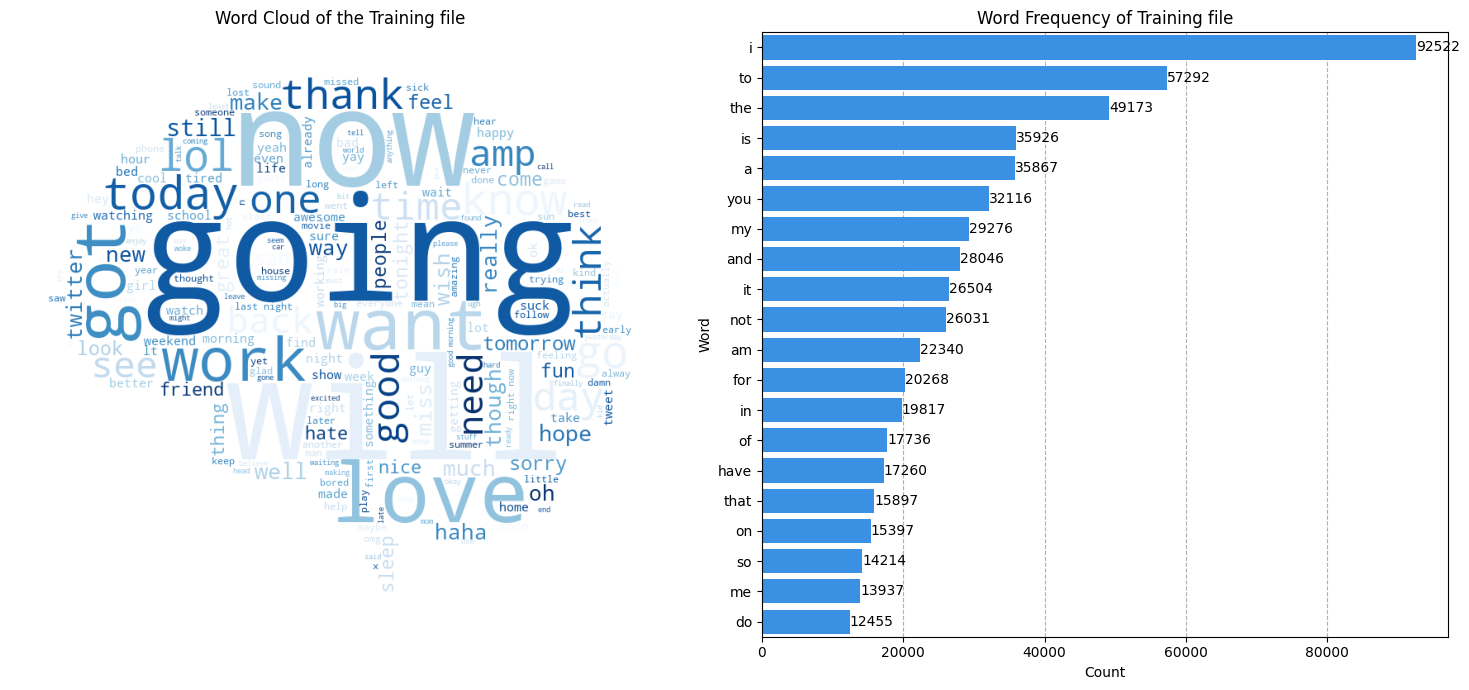

In [69]:
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import numpy as np
import PIL.Image

brain_mask = np.array(PIL.Image.open(images_base_filepath + "/brain_logo.jpg"))

def analize_words(df: pd.DataFrame, column: str, bar_color="#7AC2FF"):
    all_text = " ".join(df[column])
    all_words = " ".join(df[column]).split()
    
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    
    common_df = pd.DataFrame(most_common_words, columns=["Word", "Count"])
    
    wordcloud = WordCloud(width=800, height=800, background_color="#FFF", colormap="Blues", mask=brain_mask)
    wordcloud.generate(all_text)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    axes[0].imshow(wordcloud)
    axes[0].axis("off")
    axes[0].set_title("Word Cloud of the Training file")
    
    axes[1].set_axisbelow(True)
    axes[1].grid(zorder=1, linestyle='dashed')
    bars = sns.barplot(x="Count", y="Word", data=common_df, color=bar_color, ax=axes[1])
    bars.bar_label(bars.containers[0])
    axes[1].set_title("Word Frequency of Training file")
    
    # plt.savefig(filename)
    plt.tight_layout()
    plt.show()

analize_words(train_df, column='Cleaned_text', bar_color='dodgerblue')

The above graphs reveal to us the frequency of some words inside the dataset. The plot on the right appears to have words that are not practically useful. These words are called **stopwords** and the `wordcloud` Python package automatically ignores them. That's because we have different results on the left and right plots. Having stopwords in our dataset is not a good practice for sentiment analysis because stopwords do not add much meaning. So we will take care of them by removing them from the dataset.

In [70]:
import nltk
from nltk import data
from nltk.tokenize import word_tokenize
import time

warnings.filterwarnings("ignore", category=UserWarning, module="nltk")

def remove_stopwords(text: str) -> str:
    # Remove the stopwords from the original text
    stop_words = set(["i", "to", "the", "is", "a", "you", "my", "and", "it", "am", "for", "in", "of", "that", "on", "so", "me"])
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word not in stop_words]

    return " ".join(filtered_words)

start_time = time.time()
train_df['Cleaned_text'] = train_df['Cleaned_text'].apply(remove_stopwords)
val_df['Cleaned_text'] = val_df['Cleaned_text'].apply(remove_stopwords)
test_df['Cleaned_text'] = test_df['Cleaned_text'].apply(remove_stopwords)
end_time = time.time()


print(f"Stopwords were removed in {end_time - start_time} seconds.")

Stopwords were removed in 18.765993356704712 seconds.


By executing the code above we must have removed some useless stopwords from the dataset. Let's have a look at the dataset and the analytics one more time.

In [71]:
train_df.head(10)

,ID,Text,Label,Cleaned_text
5534,58876,#SQUARESPACE....left the doggy home alone,0,left doggy home alone
85821,20209,@Keyknow Oh good! Sorry you didn't win the tix...,1,oh good ! sorry did not win tix but glad someo...
94612,67702,graham is trying to get some online hilarious,1,graham trying get some online hilarious
16846,67558,@crisk i meant wieder... Lol. Send me your kel...,1,meant wieder lol send your kelkheim later
41924,125628,im so fucking bored i want to party like now,0,fucking bored want party like now
138076,189006,"You are not alone tonight, Imagine me there by...",0,are not alone tonight imagine there by your si...
89944,104788,@Zadi foodporn... Ooooh... you tease,0,foodporn ooooh tease
81703,49010,"@ace_libre Man, I am too! Am definitely going ...",1,man too ! definitely going haywire ! ! can not...
132670,178563,@patrickd88 Let's be PC here... I believe it's...,1,let us be pc here believe interspecies erotica
7713,102654,I'm being all avoidy with people from my proje...,0,being all avoidy with people from project


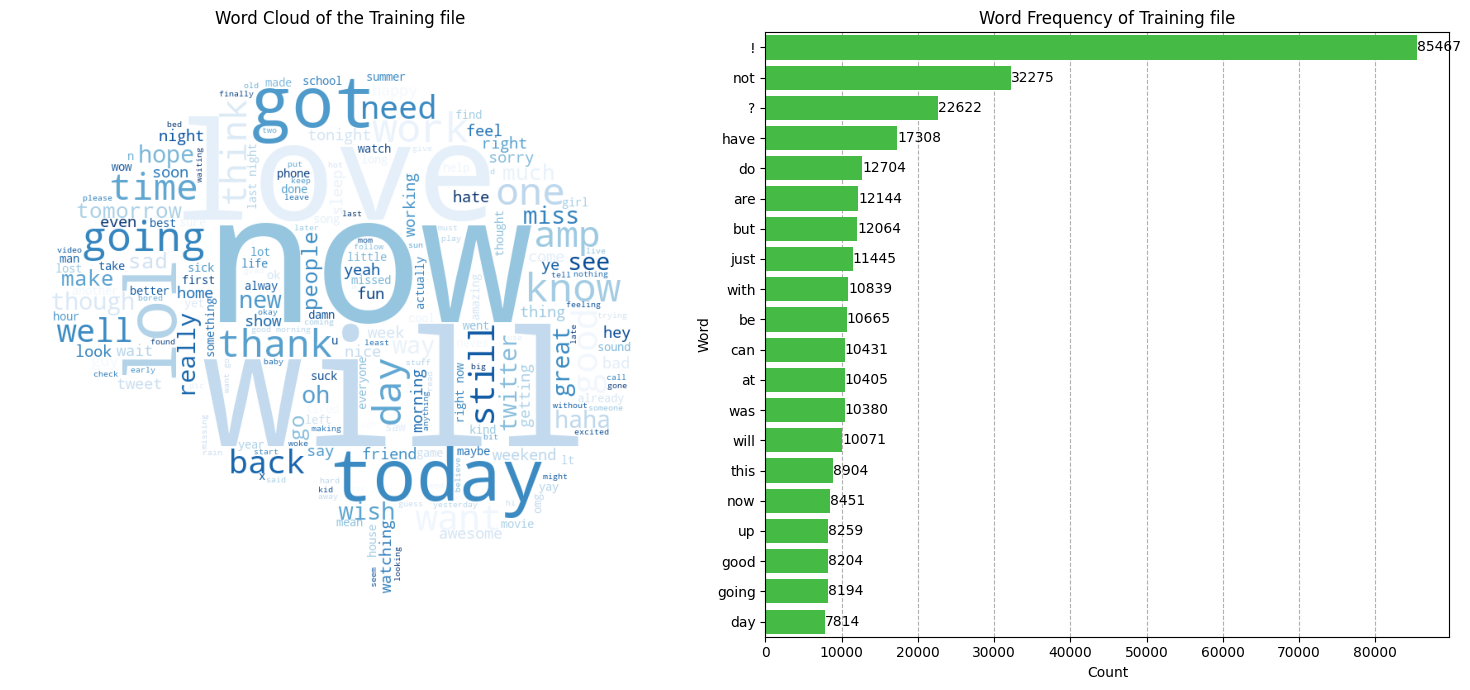

In [ ]:
analize_words(train_df, column='Cleaned_text', bar_color="orange")

As we expected all the common stopwords like 'I', 'the', 'so' and more have been deleted from the records of the dataset.

As we can see the dataset has been cleaned successfully and there not any stopwords or punctuation symbols in the records.

### Deeper Analysis 🔎📊

We are now going to fall into a deeper analysis of the dataset, in order to collect some information about the user comments.

### Text Length Analysis

#### Tweet Length DIstribution

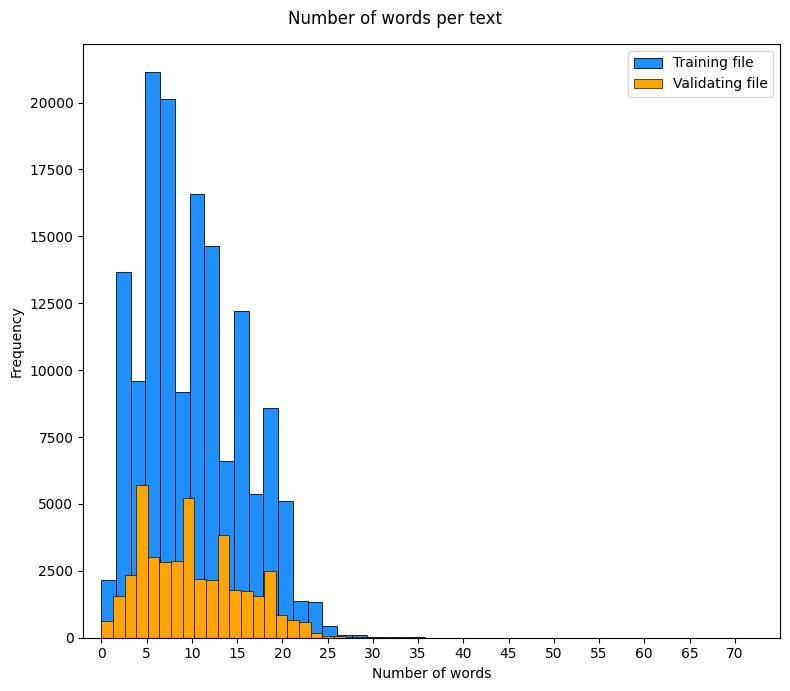

In [175]:
import seaborn as sns


train_df['num_words'] = train_df['Cleaned_text'].apply(lambda x: len(x.split()))
val_df['num_words'] = val_df['Cleaned_text'].apply(lambda x: len(x.split()))

# Plot the histogram of the number of words in the training and validating files
fig, ax = plt.subplots(figsize=(8, 7))
sns.histplot(train_df['num_words'], bins=70, color='dodgerblue', label='Training file', ax=ax, alpha=1)
sns.histplot(val_df['num_words'], bins=70, color='orange', label='Validating file', ax=ax, alpha=1)

ax.set_xlabel("Number of words")
ax.set_ylabel("Frequency")
ax.legend()

ax.set_xlim(-2, 75)
ax.set_xticks(range(0, 75, 5))

plt.suptitle("Number of words per text")
plt.tight_layout()
plt.show()


#### Comparison between positive and negative tweets

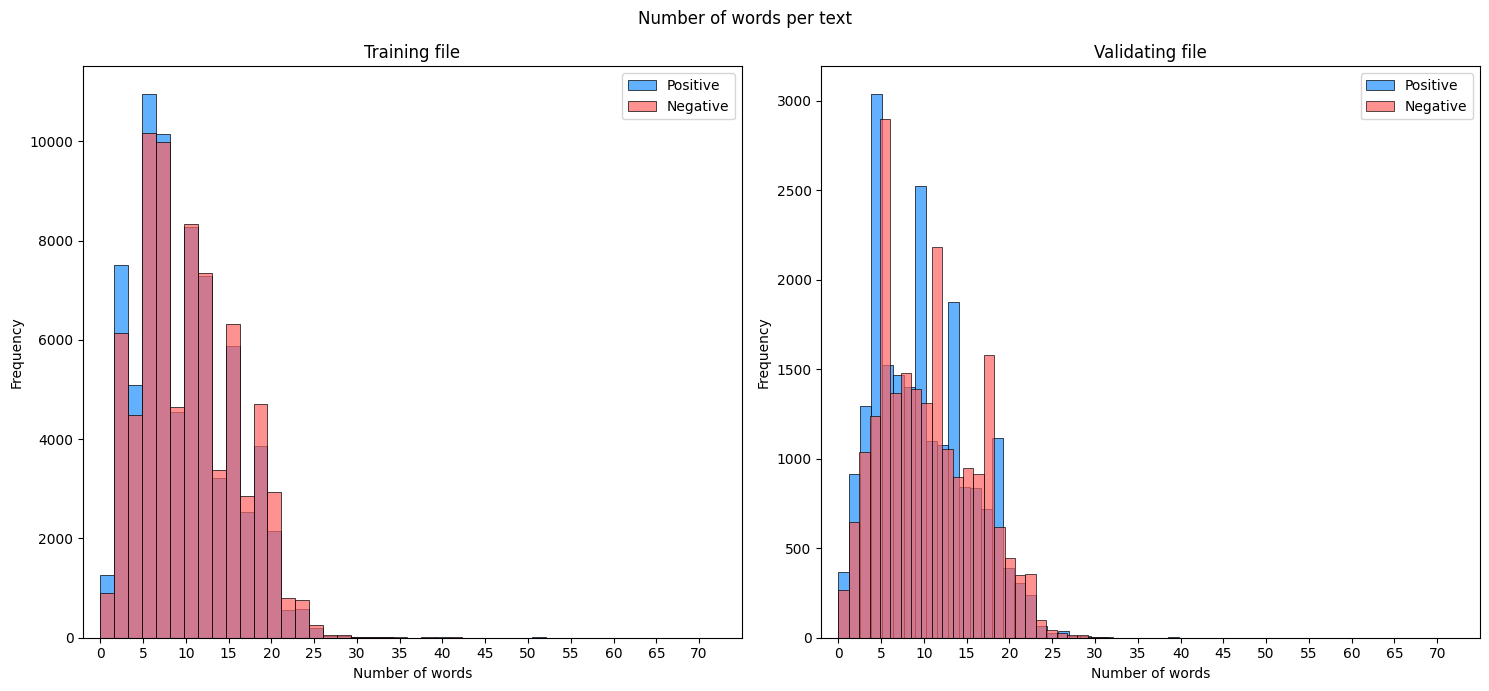

In [211]:
# Compare words frequency between positive and negative tweets
positive_train_df = train_df[train_df['Label'] == 1]
negative_train_df = train_df[train_df['Label'] == 0]

positive_val_df = val_df[val_df['Label'] == 1]
negative_val_df = val_df[val_df['Label'] == 0]

# Plot the word frequency of positive and negative tweets for the training and validating files
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(positive_train_df['num_words'], bins=70, color='dodgerblue', label='Positive', ax=axes[0], alpha=0.7)
sns.histplot(negative_train_df['num_words'], bins=70, color='#FF6262', label='Negative', ax=axes[0], alpha=0.7)

sns.histplot(positive_val_df['num_words'], bins=70, color='dodgerblue', label='Positive', ax=axes[1], alpha=0.7)
sns.histplot(negative_val_df['num_words'], bins=70, color='#FF6262', label='Negative', ax=axes[1], alpha=0.7)

axes[0].set_title("Training file")
axes[1].set_title("Validating file")

for ax in axes:
    ax.set_xlabel("Number of words")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.set_xlim(-2, 75)
    ax.set_xticks(range(0, 75, 5))
    
plt.suptitle("Number of words per text")
plt.tight_layout()
plt.show()

#### Sentiment Distribution Analysis

First we will attempt to do a **sentiment distribution analsysis** to training and validating dataset files. Specifically we will count the number of tweets for each sentiment in both training and validating files.

In [76]:
def get_sentiment_distribution(df: pd.DataFrame) -> tuple[int, int]:
    positive_count, negative_count = 0, 0
    for label in df['Label']:
        if label == 1: positive_count += 1
        else: negative_count += 1

    return positive_count, negative_count

Training file has 74196 positive tweets and 74192 negative tweets
Validating file has 21199 positive tweets and 21197 negative tweets


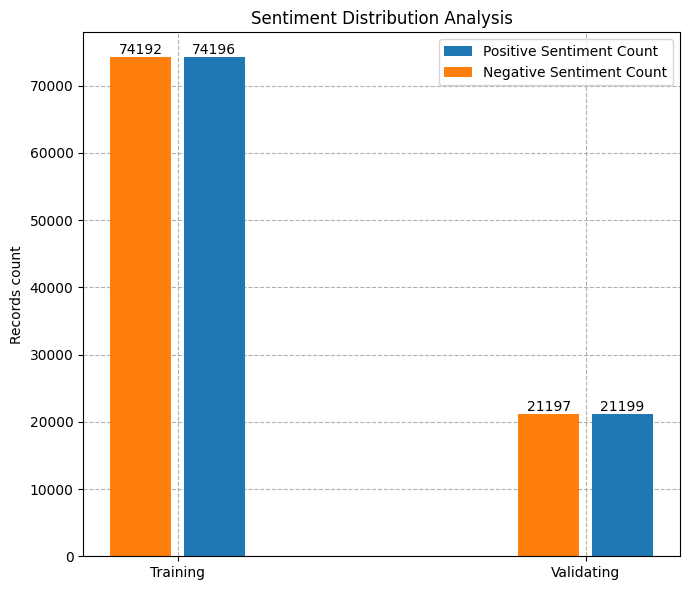

In [77]:
import numpy as np

# Get the sentiment distribution analysis of training and validating files
train_sent_dist = get_sentiment_distribution(train_df)
val_sent_dist = get_sentiment_distribution(val_df)

print(f"Training file has {train_sent_dist[0]} positive tweets and {train_sent_dist[1]} negative tweets")
print(f"Validating file has {val_sent_dist[0]} positive tweets and {val_sent_dist[1]} negative tweets")

files_labels = ["Training", "Validating"]

bar_width = 0.15
gap = 0.015

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.set_axisbelow(True)
ax.grid(zorder=1, linestyle='dashed')
positive_bar = ax.bar(np.arange(len(files_labels)) + bar_width/2+gap, [train_sent_dist[0], val_sent_dist[0]], width=bar_width, label='Positive Sentiment Count')
negative_bar = ax.bar(np.arange(len(files_labels)) - bar_width/2-gap, [train_sent_dist[1], val_sent_dist[1]], width=bar_width, label='Negative Sentiment Count')

ax.bar_label(positive_bar, label_type='edge')
ax.bar_label(negative_bar, label_type='edge')

ax.set_title('Sentiment Distribution Analysis')
ax.set_ylabel('Records count')

ax.set_xticks(np.arange(len(files_labels)))
ax.set_xticklabels(files_labels)

plt.legend()
plt.tight_layout()

# plt.savefig('../plots/dataset_sentiment_distribution.png')
plt.show()

As we can see the number of positive and negative tweets inside the training and validating dataset files are **almost equal**. In both files the positive tweets prevail over the negative ones. Generally we can say that the dataset is **balanced**.

### Generalized diagram

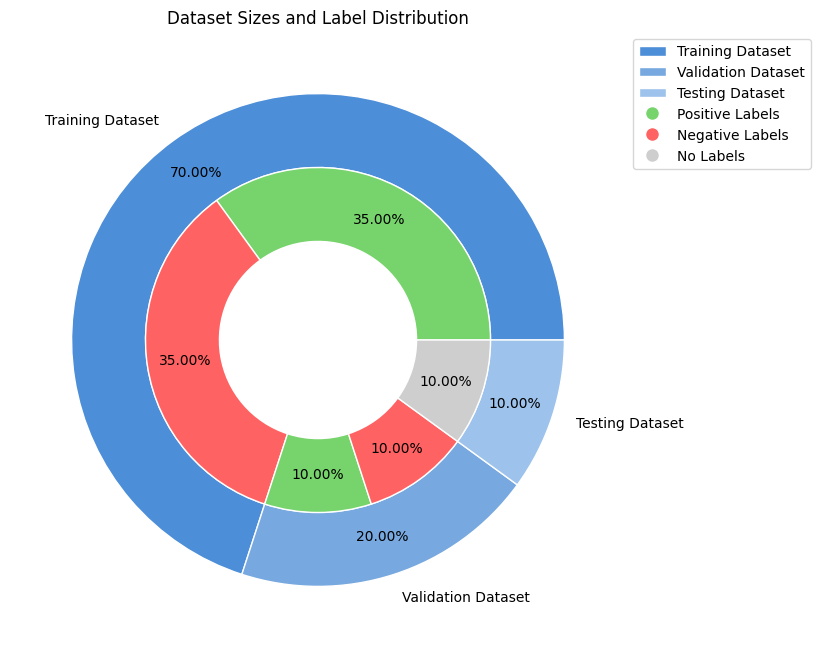

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ['Training Dataset', 'Validation Dataset', 'Testing Dataset']

# Total dataset sizes
total_sizes = np.array([train_df.shape[0], val_df.shape[0], test_df.shape[0]])

# Positive and Negative label counts (for Training and Validation datasets)
pos_counts = np.array([train_df[train_df['Label'] == 1].shape[0], val_df[val_df['Label'] == 1].shape[0], 0])  # Positive labels
neg_counts = np.array([train_df[train_df['Label'] == 0].shape[0], val_df[val_df['Label'] == 0].shape[0], 0])  # Negative labels

# Define outer ring (total dataset sizes)
outer_sizes = total_sizes
outer_labels = datasets
outer_colors = ['#4D8ED8', '#77A8DF', '#9DC2EC']

# Define inner ring (label distribution)
inner_sizes = []
inner_colors = []
legend_labels = []  # Used for a separate legend

for i in range(len(datasets)):
    if pos_counts[i] > 0 or neg_counts[i] > 0:
        inner_sizes.extend([pos_counts[i], neg_counts[i]])
        inner_colors.extend(["#77D46C", "#FF6262"])  # Green for positive, red for negative
    else:
        inner_sizes.append(total_sizes[i])  # No labels
        inner_colors.append("#CECECE")  # Gray for unlabeled data

fig, ax = plt.subplots(figsize=(8, 8))

# Function to manually compute and display correct percentages
def correct_autopct(pct, values):
    absolute = int(round(pct / 100. * np.sum(values)))  # Convert percent to actual count
    true_pct = absolute / np.sum(values) * 100  # Compute correct percentage
    return f"{true_pct:.2f}%" if absolute > 0 else ""  # Hide zero values

# Outer pie (Total dataset sizes) with percentages
outer_patches, outer_texts, outer_autotexts = ax.pie(
    outer_sizes, labels=outer_labels, colors=outer_colors, radius=1, 
    wedgeprops=dict(width=0.3, edgecolor='w'), autopct=lambda pct: correct_autopct(pct, outer_sizes)
)

# Inner pie (Label distribution) with percentages
inner_patches, inner_texts, inner_autotexts = ax.pie(
    inner_sizes, colors=inner_colors, radius=0.7,
    wedgeprops=dict(width=0.3, edgecolor='w'), autopct=lambda pct: correct_autopct(pct, inner_sizes)
)

# Adjust the percentage label positions to move them slightly outward
for autotext in outer_autotexts:
    x, y = autotext.get_position()
    autotext.set_position((x * 1.4, y * 1.4))  # Move outward

for autotext in inner_autotexts:
    x, y = autotext.get_position()
    autotext.set_position((x * 1.3, y * 1.3))  # Move further outward for inner pie

# Create legend manually (only unique "Positive" and "Negative" labels)
legend_patches = outer_patches  # Only dataset labels initially
legend_labels = outer_labels  # Only dataset names initially

# Add a single entry for "Positive" and "Negative"
positive_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='#77D46C', label="Positive Labels")
negative_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='#FF6262', label="Negative Labels")
no_label_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='#CECECE', label="No Labels")

# Extend the legend with "Positive" and "Negative" colors
legend_patches.extend([positive_patch, negative_patch, no_label_patch])
legend_labels.extend(["Positive Labels", "Negative Labels", "No Labels"])

ax.legend(handles=legend_patches, labels=legend_labels, loc="upper left", bbox_to_anchor=(1, 1))

# Title
plt.title("Dataset Sizes and Label Distribution")
plt.show()


#### Sentiment Correlation

Finally we will do some **sentiment correlation** with **specific words**. In other words we will identify the words that are highly correlated with a specific sentiment. Let's begin by splitting the training dataset into two data frames containing all the positive and negative tweets.

In [79]:
train_positive_df = train_df[train_df['Label'] == 1]
train_negative_df = train_df[train_df['Label'] == 0]

In [80]:
train_positive_df.head()

,ID,Text,Label,Cleaned_text
85821,20209,@Keyknow Oh good! Sorry you didn't win the tix...,1,oh good ! sorry did not win tix but glad someo...
94612,67702,graham is trying to get some online hilarious,1,graham trying get some online hilarious
16846,67558,@crisk i meant wieder... Lol. Send me your kel...,1,meant wieder lol send your kelkheim later
81703,49010,"@ace_libre Man, I am too! Am definitely going ...",1,man too ! definitely going haywire ! ! can not...
132670,178563,@patrickd88 Let's be PC here... I believe it's...,1,let us be pc here believe interspecies erotica


In [81]:
train_negative_df.head()

,ID,Text,Label,Cleaned_text
5534,58876,#SQUARESPACE....left the doggy home alone,0,left doggy home alone
41924,125628,im so fucking bored i want to party like now,0,fucking bored want party like now
138076,189006,"You are not alone tonight, Imagine me there by...",0,are not alone tonight imagine there by your si...
89944,104788,@Zadi foodporn... Ooooh... you tease,0,foodporn ooooh tease
7713,102654,I'm being all avoidy with people from my proje...,0,being all avoidy with people from project


Let's find and plot the **30 most common** words in each data frame.

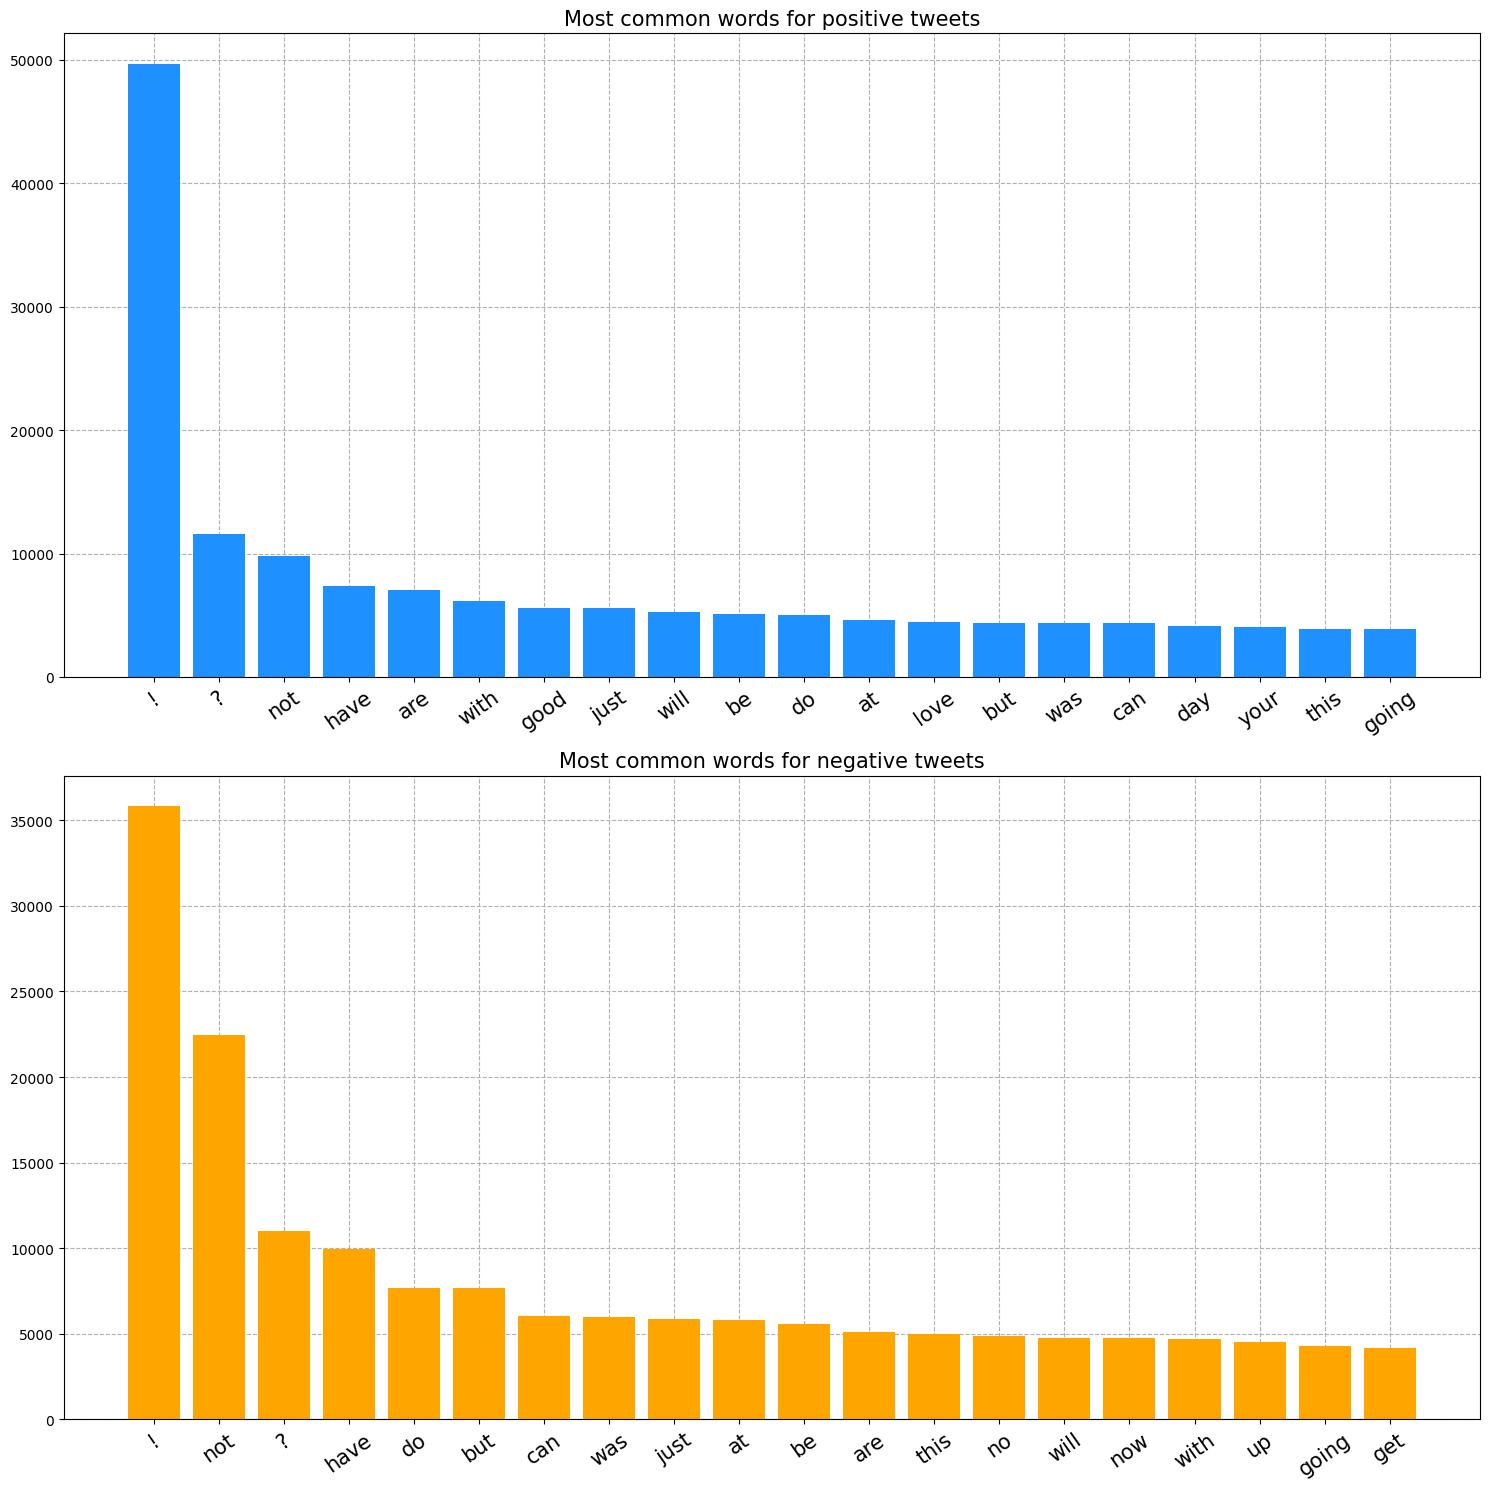

In [82]:
from collections import Counter

# Receive all the words from the positive dataframe
all_train_positive_text = " ".join(train_positive_df['Cleaned_text'])
all_train_positive_words = all_train_positive_text.split()

# Find the most common words
train_positive_words_counter = Counter(all_train_positive_words)
most_common_train_positive_words = train_positive_words_counter.most_common(20)

# Receive all the words from the negative dataframe
all_train_negative_text = " ".join(train_negative_df['Cleaned_text'])
all_train_negative_words = all_train_negative_text.split()

# Find the most common words
train_negative_words_counter = Counter(all_train_negative_words)
most_common_train_negative_words = train_negative_words_counter.most_common(20)

# Plot the data
positive_labels = [word[0] for word in most_common_train_positive_words]
positive_count = [word[1] for word in most_common_train_positive_words]

negative_labels = [word[0] for word in most_common_train_negative_words]
negative_count = [word[1] for word in most_common_train_negative_words]

fig, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].set_axisbelow(True)
axes[0].grid(zorder=1, linestyle='dashed')
axes[0].bar(positive_labels, positive_count, color="dodgerblue")
axes[0].set_title('Most common words for positive tweets', fontsize=15)
axes[0].set_xticklabels(labels=positive_labels, rotation=35, fontsize=15)

axes[1].set_axisbelow(True)
axes[1].grid(zorder=1, linestyle='dashed')
axes[1].bar(negative_labels, negative_count, color="orange")
axes[1].set_title('Most common words for negative tweets', fontsize=15)
axes[1].set_xticklabels(labels=negative_labels, rotation=35, fontsize=15)

# plt.savefig('../plots/most_common_words.png')
plt.tight_layout()
plt.show()

As we can see the most common word for positive tweets is **'get'** and for negative tweets is the word **'go'**.

## Training the model 🤖🧠

We will now perform the **training process** of the model. We will start by initializing the **TF-IDF** vectorizer.

In [83]:
train_df

,ID,Text,Label,Cleaned_text
5534,58876,#SQUARESPACE....left the doggy home alone,0,left doggy home alone
85821,20209,@Keyknow Oh good! Sorry you didn't win the tix...,1,oh good ! sorry did not win tix but glad someo...
94612,67702,graham is trying to get some online hilarious,1,graham trying get some online hilarious
16846,67558,@crisk i meant wieder... Lol. Send me your kel...,1,meant wieder lol send your kelkheim later
41924,125628,im so fucking bored i want to party like now,0,fucking bored want party like now
...,...,...,...,...
24492,101561,@FlyBecuzHEIs im takin pics for you!....but it...,0,takin pics ! but its rainy here concerts outside
65975,46467,@bill_archie yes...even debz does have the sam...,0,yeseven debz does have same dilemmaactually go...
71649,52032,#lazyweb Is there a park at Alvechurch / Hopwo...,1,there park at alvechurch hopwood ?
128627,1970,had fun with katie this weekend her photos ki...,1,had fun with katie this weekend her photos kic...


### Vectorizing the data
We will start by **vectorizing** our data.

In [411]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_data(train_df, val_df, test_df):
    vectorizer = TfidfVectorizer(
        max_features=100,
        ngram_range=(1, 4)
    )

    X_train = vectorizer.fit_transform(train_df['Cleaned_text'])
    X_val = vectorizer.transform(val_df['Cleaned_text'])
    X_test = vectorizer.transform(test_df['Cleaned_text'])
    
    y_train = train_df['Label']
    y_val = val_df['Label']

    return X_train, X_val, X_test, y_train, y_val, vectorizer

In [412]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the data and vectorize them using TF-IDF method
X_train, X_val, X_test, y_train, y_val, vectorizer = vectorize_data(train_df, val_df, test_df)
print(X_train.shape, X_val.shape)

(148388, 100) (42396, 100)


Our result matrix is a $148388 \times 13316$ on which the rows represent the documents and the columns represent the words.

### PCA & SVD for Data Visualization

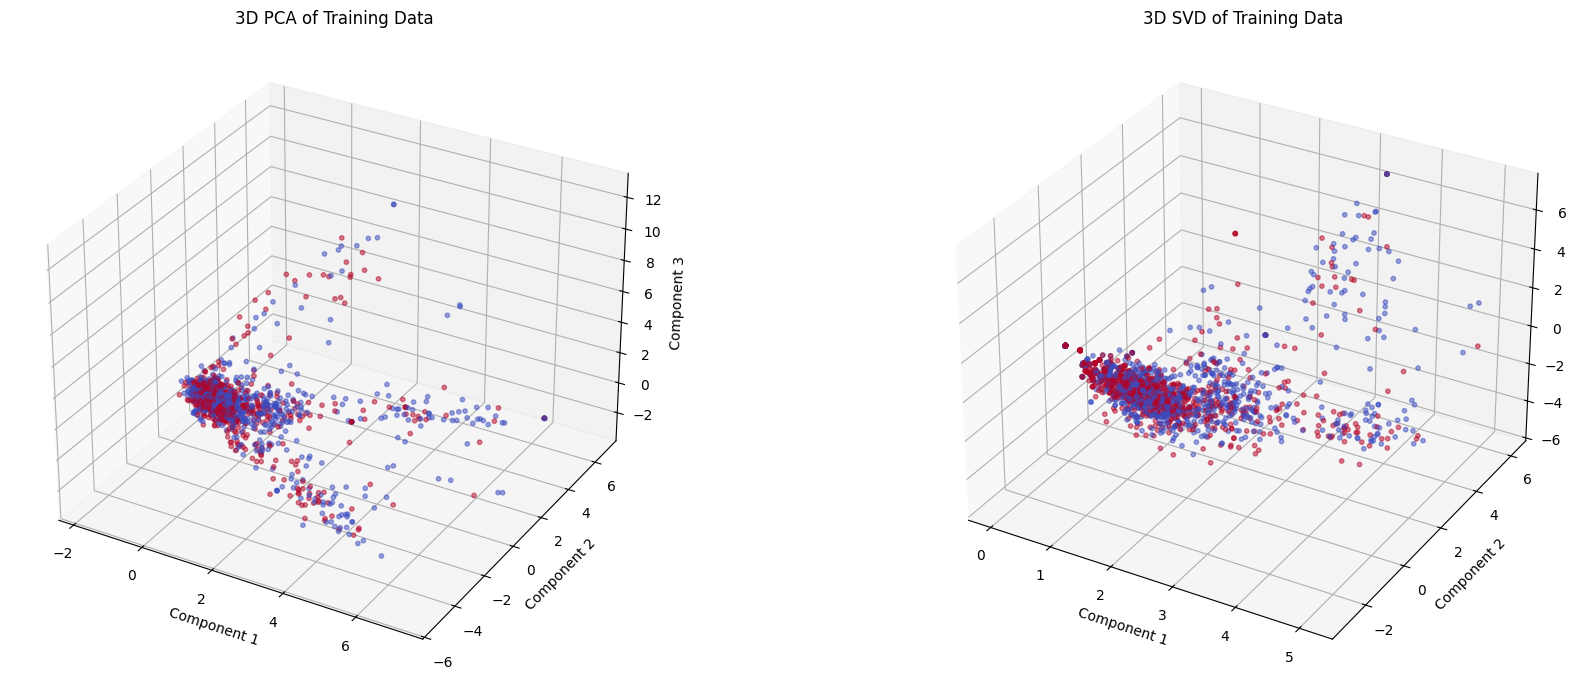

In [407]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Standardize the data
scaler = StandardScaler(with_mean=False)  # with_mean=False to handle sparse matrix
X_train_scaled = scaler.fit_transform(X_train[:2000])

# Apply PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply SVD
svd = TruncatedSVD(n_components=3)
X_train_svd = svd.fit_transform(X_train_scaled)

# Visualize the PCA and SVD results in 3D
fig = plt.figure(figsize=(20, 7))

# PCA plot
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train[:2000], s=10, cmap='coolwarm', alpha=0.5)
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('3D PCA of Training Data')

# SVD plot
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_train_svd[:, 0], X_train_svd[:, 1], X_train_svd[:, 2], c=y_train[:2000], s=10, cmap='coolwarm', alpha=0.5)
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_zlabel('Component 3')
ax2.set_title('3D SVD of Training Data')

plt.tight_layout()
plt.show()


### Default Prediction
We will start by executing a default (dummy) prediction on our **validation data** without having a trained model.

In [343]:
batch_size = 1000  

weights, bias = np.random.randn(X_val.shape[1], 1), np.random.randn()
y_pred = np.zeros((X_val.shape[0], 1))  # Placeholder for predictions

# Use batches for faster calculation
for i in range(0, X_val.shape[0], batch_size):
    batch_end = i + batch_size
    y_pred[i:batch_end] = X_val[i:batch_end] @ weights + bias

y_pred = np.where(y_pred >= 0.5, 1, 0)
accuracy = accuracy_score(y_val, y_pred)
print(f"Default Accuracy: {accuracy}")

Default Accuracy: 0.5271016133597509


As we can see a random default prediction gives an **accuracy** of about **0.5**. That is logical to happen due to the fact that the datasets are **balanced** as we saw previously.

### Logistic Regression Definition
We will continue by creating the model on which the training procedure will be done. This of course is based on the **Logistic Regression**. We will also train our model using the train file.

In [344]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Testing the model
After the **model training**, the next step is to **test** the model using the **validation data**. We will test the model and print the **accuracy** and the **classification report**.

In [345]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
print(f"Accuracy: {accuracy}\nClassification Report:\n{report}")

Accuracy: 0.6657703556939334
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65     21197
           1       0.65      0.71      0.68     21199

    accuracy                           0.67     42396
   macro avg       0.67      0.67      0.67     42396
weighted avg       0.67      0.67      0.67     42396



As we se, the accuracy of the model is **around 0.7650** and the **classification report** is being shown above. We can also plot the **confusion matrix** to take a better look at the results.

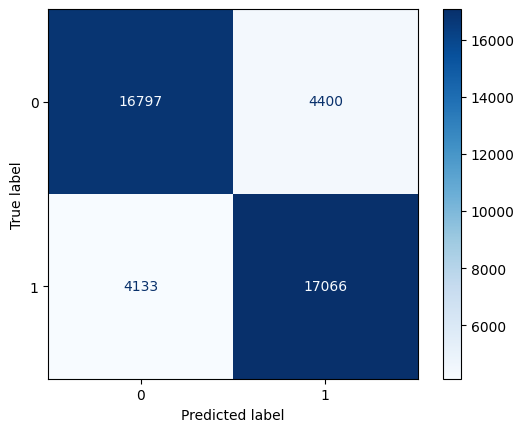

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_val, y_pred),
    display_labels=model.classes_
)
disp.plot(cmap="Blues")
plt.show()

The confusion matrix shows the results of the model prediction on the validation data and we observe that **most of the time** the predictions were **correct**. There are although some mistakes, such as that 4609 positive comment where predicted as negative and 5350 negative were predicted as positive. 

Let's also plot the learning curves of the model.

In [90]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=2, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

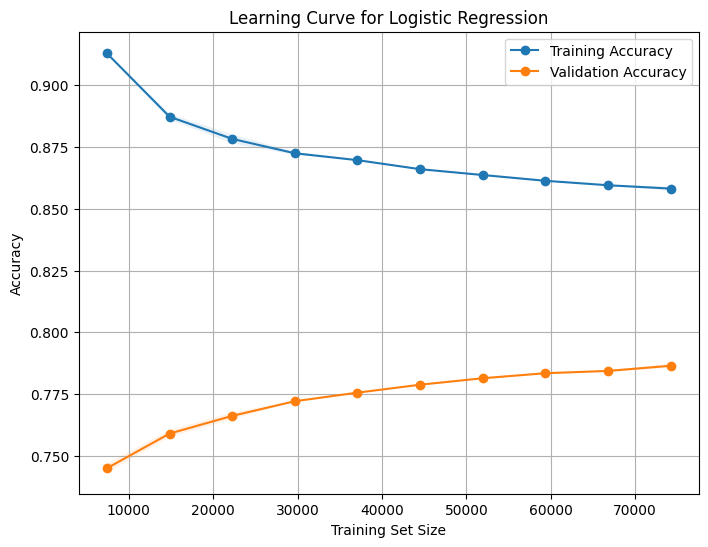

In [91]:
# Compute mean and std deviation for shading
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(test_scores, axis=1)
val_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.grid()
plt.show()

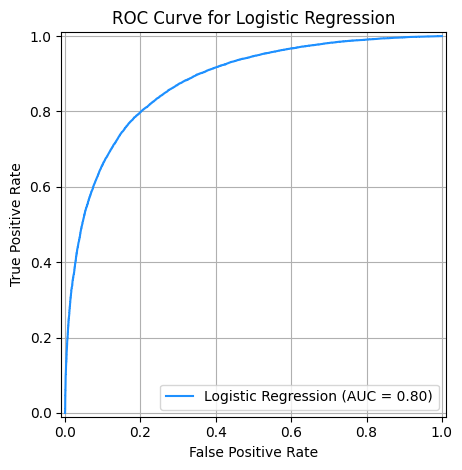

In [92]:
# Exctarct the ROC curve of the model
from sklearn.metrics import roc_curve, RocCurveDisplay

y_pred_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

roc_display = RocCurveDisplay(
  fpr=fpr, 
  tpr=tpr, 
  roc_auc=model.score(X_val, y_val),
  estimator_name="Logistic Regression",
)
roc_display.plot(color='dodgerblue')

plt.title("ROC Curve for Logistic Regression")
plt.grid(True)

plt.tight_layout()
plt.show()

In [93]:
y_pred = model.predict(X_test)

submission_df = pd.DataFrame({'ID': test_df['ID'], 'Label': y_pred})
submission_df.to_csv('submission.csv', index=False)
submission_df

,ID,Label
0,102388,1
1,153802,0
2,61831,0
3,18317,1
4,50061,1
...,...,...
21194,101544,0
21195,5461,0
21196,135996,1
21197,157554,1


In [94]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize the model
model = LogisticRegression()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.7937838636410358


LogisticRegression(C=1)

In [95]:
# Evaluate the model
y_probs = best_model.predict_proba(X_val)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
print(f"Accuracy: {accuracy}\nClassification Report:\n{report}")

Accuracy: 0.7987781866213793
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     21197
           1       0.80      0.80      0.80     21199

    accuracy                           0.80     42396
   macro avg       0.80      0.80      0.80     42396
weighted avg       0.80      0.80      0.80     42396



In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))


Accuracy: 0.7987781866213793
Precision: 0.7952087994034303
Recall: 0.8048492853436483
F1 Score: 0.8
